# İş Uygulaması
Web sitesinde geçirilen zamanın testi

# Problem
#### Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

# Detaylar
* Yazılımlardan elde edilen web sitesinde geçirilen ort. süreler var.
* Bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyorlar.

In [1]:
import numpy as np
import pandas as pd
olcumler = np.random.randint(10, 300, 100)

In [2]:
import scipy.stats as stats

stats.describe(olcumler)

DescribeResult(nobs=100, minmax=(11, 291), mean=158.34, variance=6412.792323232323, skewness=-0.09349289486675284, kurtosis=-1.1341438813382059)

### Rastgele oluşturulan bu datadaki değerlerin ortalması 157 çıktı. Biz geçirilen sürenin 170 saniye olup olmadığını anlamaya çalışıyorduk. Bu değerlere bakarak bir yorumda bulunamayız, bunu yaparsak hata etmiş oluruz. Neden;

### Başka bir grup datayı alıp incelersek belki de ortalma 170 den büyük çıkar bunu bilemeyiz. İşte bu yüzden T-testi varayım kontrolü yapmamız lazım. İsimden de anlaşılacağı üzere "varsayım kontrolü".

# Tek Örneklem T Testi Varsayım Kontorlü

In [3]:
# varsayımlar 
# normallik varsayımı

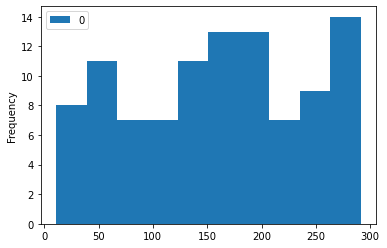

In [4]:
# histogram
pd.DataFrame(olcumler).plot.hist();

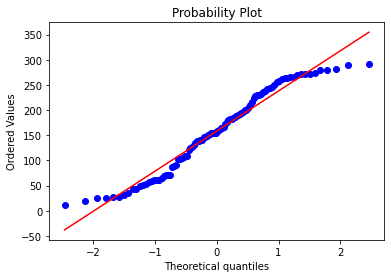

In [5]:
# qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot = pylab)
pylab.show()

In [6]:
# Shapiro-Wilks Testi
# Elimizdeki ölçümün normal olup olmadığını test eder.

from scipy.stats import shapiro

shapiro(olcumler)

ShapiroResult(statistic=0.9539303779602051, pvalue=0.001519900979474187)

In [7]:
print("T Hesap İstatistiği : " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-Value  : " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği : 0.9539303779602051
Hesaplanan P-Value  : 0.001519900979474187


In [8]:
# Hipotez testinin uygulanması
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-1.4560455541294866, pvalue=0.1485440871941794)

H0: web sitemizde geçirilen ortalama süre 170'tir.
H1: web sitemizde geçirilen ortalama süre 170 değildir.

p-value < 0.05 old. için, H0 reddedilmiştir.

# Nonparametrik Tek Örneklem Testi

In [9]:
from statsmodels.stats.descriptivestats import sign_test

In [12]:
sign_test(olcumler, 170)

(-5.0, 0.36820161732669654)